# Shannon's Entropy of an image: Comparing famous paintings

Degas:
Shannon =7.202560157521115
Entropy = 7.202560157521425
Shannon entropy=7.202560157521115 bits/pixel
Seurat:
Shannon =7.419443269769362
Entropy = 7.419443269769619
Shannon entropy=7.419443269769362 bits/pixel
Monet:
Shannon =6.994113995511796
Entropy = 6.994106930159873
Shannon entropy=6.994113995511796 bits/pixel
Van Gogh:
Shannon =7.350157443961894
Entropy = 7.350157443962148
Shannon entropy=7.350157443961894 bits/pixel
Maximum Entropy = 8.0 bits/pixel


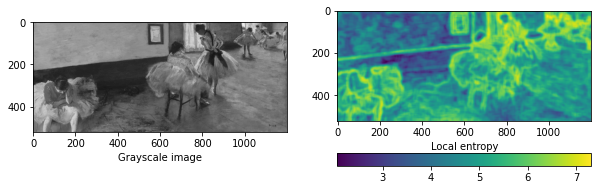

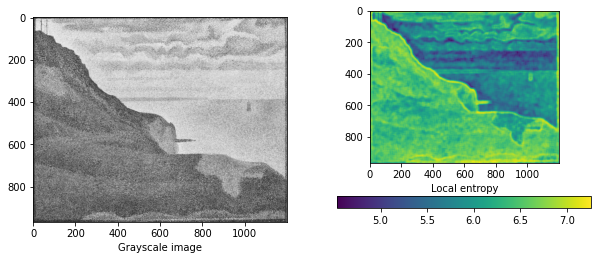

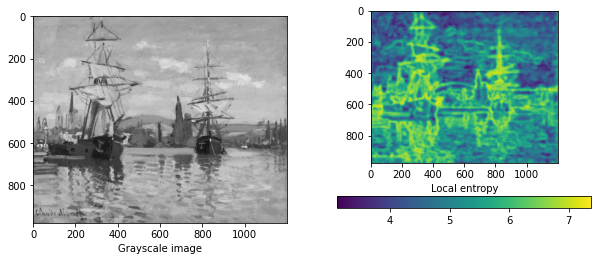

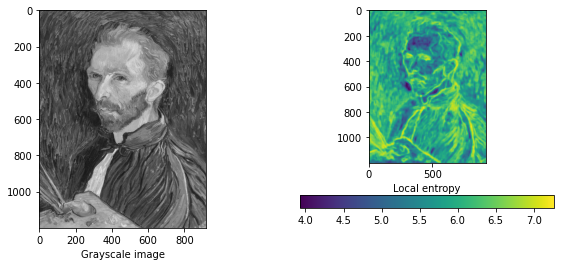

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io

from skimage import data
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.measure import shannon_entropy
import skimage as sk 

def entropy_image(imgG):

    img = img_as_ubyte(imgG) # convert to uint8

# Local entropy in a certain pixel neiborhood:
    entr_img = entropy(img, np.ones((21,21)))
    shannon_img = shannon_entropy(img)
    print('Shannon ={}'.format(shannon_img))
# Flatten the image (convert from matrix to vector):
    v = img.flatten()
# For each grayscale leve, get the pixel probability of occurrence:
    probg,edges = np.histogram(v,bins=np.arange(256), density=True)
    eps = 1e-16
    probg = probg + eps
# Compute Shannon's entropy:
    H_noise = -np.sum(probg * np.log2(probg), axis=0)
# Compare: 
    print('Entropy = {}'.format(H_noise))

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

    ax1.imshow(img, cmap='gray')
    ax1.set_xlabel("Grayscale image")
    h1 = ax2.imshow(entr_img, cmap='viridis')
    ax2.set_xlabel("Local entropy")
    fig.colorbar(h1,ax=ax2,orientation='horizontal') # visualize colorbar 
    return entr_img,shannon_img

# Open access images downloaded with permission from: 
# https://images.nga.gov

print('Degas:')
imgC = sk.io.imread('degas.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Seurat:')
imgC = sk.io.imread('seurat.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Monet:')
imgC = sk.io.imread('monet.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

print('Van Gogh:')
imgC = sk.io.imread('vangogh.jpg') # read image using imread function
imgG = sk.color.rgb2gray(imgC)
IE,shannon = entropy_image(imgG)
print('Shannon entropy={} bits/pixel'.format(shannon))

# Maximum entropy: An image with equal probabilities for each grayscale level:
nsymbols = np.power(2,8) 
prob_equal = (1/nsymbols)*np.ones(nsymbols)
H_max = -np.sum(prob_equal * np.log2(prob_equal), axis=0)
print('Maximum Entropy = {} bits/pixel'.format(H_max))